<a href="https://colab.research.google.com/github/johnnycleiton07/image-processing/blob/main/frequency_domain_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

#**FILTRAGEM NO DOMÍNIO DE FREQUÊNCIA**

## Processamento Digital de Imagens

Ciência da Computação 


</center>




# Domínio de Frequência

* A filtragem no domínio de frequência realiza operações com a **Transformada de Fourier** de uma imagem e não diretamente na própria imagem.

* Geralmente são executados os seguintes passos:
 * Primeiro é aplicada a **transformada de fourier** que traz a representação da imagem no espaço para o domínio de frequência;
 * Então, como os valores no domínio de frequência geralmente são altos, é utilizada uma **função logarítmica** para abaixar os valores e assim melhorar a visualização;
 * Em seguida é aplicada a operação **shift**, que leva as baixas frequências para o centro e as altas frequências para as bordas.
 * Esse é o momento da aplicação de algum **filtro** na imagem (ainda no domínio de frequência).
 * Após a aplicação do filtro, é feito o **shift inverso** para retornar com as baixas frequências nas bordas e as altas no centro.
 * Por último, é calculada a **transformada inversa de fourier** para trazer o resultado da imagem filtrada no domínio de frequência para o domínio espacial.


### Transformada de Fourier em Python
 

In [186]:
#acessando as imagens no google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
#importando as bibliotecas

import cv2 as cv
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

image_path = "/content/drive/MyDrive/Colab Notebooks/images/"

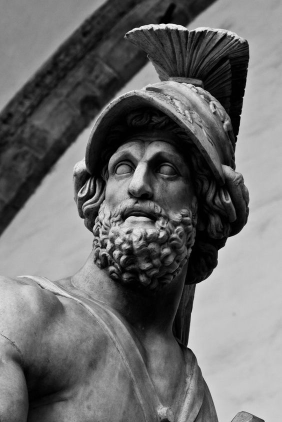

In [188]:
#leitura da imagem em cores de cinza

image = cv.cvtColor(io.imread(image_path + "soldier.jpg"), cv.COLOR_RGBA2GRAY)
cv2_imshow(cv.resize(image, None, fx=.5, fy=.5))

No seguinte trecho de código é aplicada a tranformada de fourier na imagem, como função nativa da biblioteca NumPy.

* Como resultado se tem o **espectro da transformada de fourier** com as baixas frequências nos cantos e as altas frequências no centro.

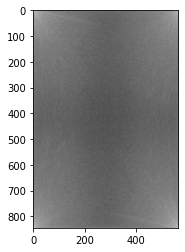

In [189]:
#transformada de fourier

image_fft = np.fft.fft2(image)

# plt.imshow(np.abs(image_fft), cmap="gray") #visualização sem a função logarítmica
plt.imshow(np.log(1+np.abs(image_fft)), cmap="gray")

plt.show()

No trecho abaixo é aplicado o **shift** (também como função nativa do NumPy).
 * Agora as baixas frequências ficam no centro e as altas ficam nos cantos. Essa composição facilita a utilização dos filtros.

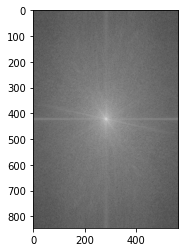

In [190]:
#aplicação do shift

image_fft_shift = np.fft.fftshift(image_fft)

plt.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
plt.show()

Após a aplicação de algum filtro, é feito o **shift inverso** abaixo.

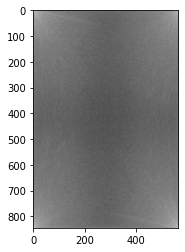

In [191]:
#shift inverso
image_fft_shift_inverso = np.fft.ifftshift(image_fft_shift)

plt.imshow(np.log(1+np.abs(image_fft_shift_inverso)), cmap="gray")
plt.show()

Finalmente é feita a aplicação da **transformada inversa de fourier**. 
* Como nenhum filtro foi aplicado a imagem será a original sem perda de informações.

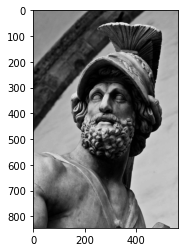

In [192]:
#transformada inversa de fourier
image_fft_inverso = np.fft.ifft2(image_fft_shift_inverso)

plt.imshow(np.abs(image_fft_inverso), cmap="gray")
plt.show()

<center>

#**FILTROS NO DOMÍNIO DE FREQUÊNCIA**

## Passa-baixa e Passa-alta: Ideal, Butterworth e Gaussiano


</center>




# Filtro Passa-Baixa

* Remove frequências altas, deixando passar as frequências mais baixas.
* Possui efeito de borramento na imagem.


# Filtro Passa-Alta

* Remove frequências baixas, deixando passar as frequências mais altas.
* Aguçamento de imagens: realça componentes de alta frequência da imagem.

**OBS:** para implementar os filtros passa-alta, basta inverter as fórmulas dos filtros passa-baixa.

# Passa-baixa Ideal

* Um filtro passa-baixa deixa passar, sem atenuação, todas as frequências em um cı́rculo de raio $D_0$ a partir da origem e "recorta" todas as frequências fora desse cı́rculo:

$$
H(u,v) = 
\begin{cases}
    1,& \text{se } D(u,v) \leq D_0\\
    0,& \text{se } D(u,v) > D_0
\end{cases}
$$

* $D_0$ é uma constante positiva, é o valor relativo ao limiar (raio).
* $D(u,v)$ é a distância entre um ponto $(u,v)$ do domı́nio da frequência e o centro do retângulo de frequência.
* $1$ porque qualquer número multiplicado por 1 não modifica o valor, então todos os valores que estiverem dentro do raio ($\leq D_0$) não terão seus valores alterados.
* $0$ porque qualquer número multiplicado por zero vai ser zero, então todos os números que estiverem fora do raio ($> D_0$) serão retirados da imagem.

## código:


In [193]:
#distância euclidiana para identificar se um ponto está dentro ou não do raio (D_0)

#este trecho de código é essencial para todos os filtros!

def distance(point_1,point_2):
    from math import sqrt
    return sqrt((point_1[0]-point_2[0])**2 + (point_1[1]-point_2[1])**2)

In [194]:
#filtro passa-baixa ideal

def passa_baixa_ideal(D_0, imageShape): #é passado raio e formato da imagem
  base = np.zeros(imageShape[:2]) #o filtro é preenchido com zeros
  rows, cols = imageShape[:2] #linhas e colunas da imagem
  center = (rows/2, cols/2) #centro da imagem
  for x in range(cols): #percorrendo as colunas
    for y in range(rows): #percorrendo as linhas
      if distance((y, x), center) < D_0: #fórmula passa-baixa
        base[y, x] = 1 #os pontos que estiverem dentro do raio (D_0) ganham valor 1

  return base

LowPass = passa_baixa_ideal(50, image.shape) #50 é o valor do raio (D_0)

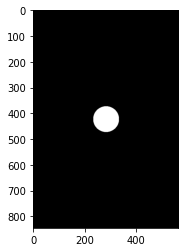

In [195]:
# exibição da IMAGEM ORIGINAL com o filtro passa-baixa ideal
plt.imshow(np.abs(LowPass), "gray")

plt.show()

Como os filtros são aplicados na imagem dentro do Domínio de Frequência, é necessário pegar o resultado de processamento da transformada de fourier junto do shift e multiplicar pelo filtro.
  * **O código da Transformada de Fourier será aproveitado para execução dos filtros.**

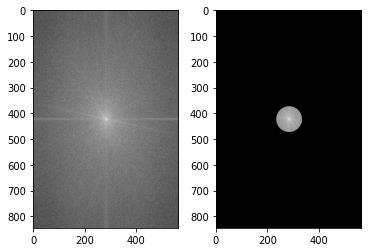

In [196]:
#multiplicação da imagem original no domínio de frequência pela função do filtro

#LowPassCenter = image_fft_shift * passa_baixa_ideal(50, image.shape)
LowPassCenter = image_fft_shift * LowPass

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPassCenter)), cmap="gray")

O próximo passo é a aplicação do shift inverso.


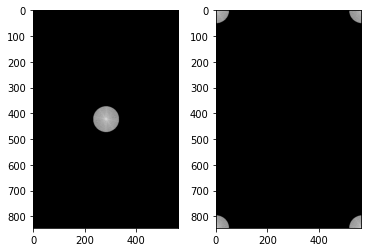

In [197]:
LowPass_shift_inverse = np.fft.ifftshift(LowPassCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowPassCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPass_shift_inverse)), cmap="gray")

Por fim, aplica a transformada inversa de Fourier.

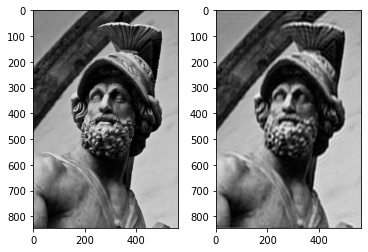

In [198]:
inverse_LowPass = np.fft.ifft2(LowPass_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowPass), cmap="gray")

# Passa-alta Ideal

$$
H(u,v) = 
\begin{cases}
    0,& \text{se } D(u,v) \leq D_0\\
    1,& \text{se } D(u,v) > D_0
\end{cases}
$$

## código:

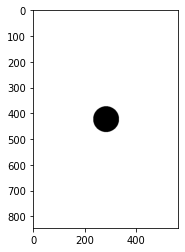

In [199]:
#filtro passa-alta ideal

def passa_alta_ideal(D_0, imageShape):
    base = np.zeros(imageShape[:2])
    rows, cols = imageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) > D_0:
                base[y,x] = 1
    return base

HighPass = passa_alta_ideal(50, image.shape)
plt.imshow(np.abs(HighPass), "gray")

plt.show()

Aplicação do filtro na imagem após o shift:


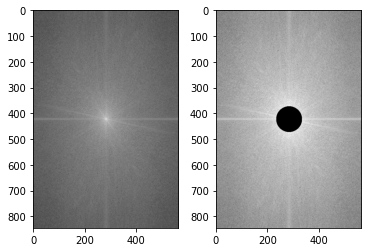

In [200]:
HighPassCenter = image_fft_shift * HighPass

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPassCenter)), cmap="gray")

Aplicação do shift inverso:


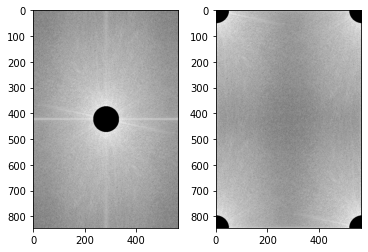

In [201]:
HighPass_shift_inverse = np.fft.ifftshift(HighPassCenter)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(HighPassCenter)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPass_shift_inverse)), cmap="gray")

Aplicação da transformada inversa de fourier:

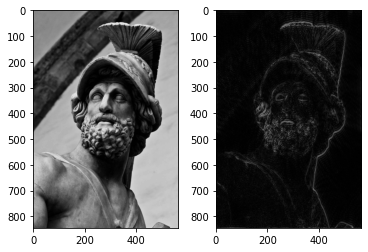

In [202]:
inverse_HighPass = np.fft.ifft2(HighPass_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_HighPass), cmap="gray")

# Passa-baixa Butterworth

* Diferentemente do filtro ideal, o butterworth não tem descontinuidade abrupta. No caso, a transição dos traços na imagem são mais suaves.
$$
H(u,v) = \frac{1}{1 + [\frac{D(u,v)}{D_0}]^{2n}}
$$
* $D(u,v)$ é a distância entre um ponto $(u,v)$ no domı́nio da frequência e o centro da função frequência.

## código:


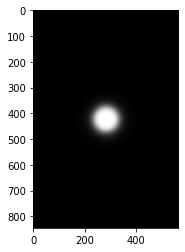

In [203]:
#filtro passa baixa Butterworth

def passa_baixa_butterworth(D_0, imgageShape, n):
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D_0)**(2*n)) #fórmula 
    return base

LowPass_BW = passa_baixa_butterworth(50, image.shape, 3)
plt.imshow(np.abs(LowPass_BW), "gray")

plt.show()

Aplicação do filtro na imagem após o shift:

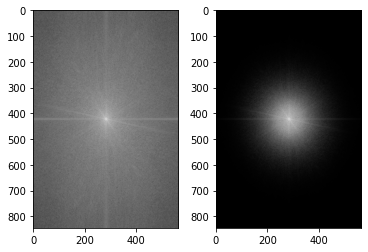

In [204]:
LowPass_BW_Center = image_fft_shift * LowPass_BW

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPass_BW_Center)), cmap="gray")

Aplicação do shift inverso:

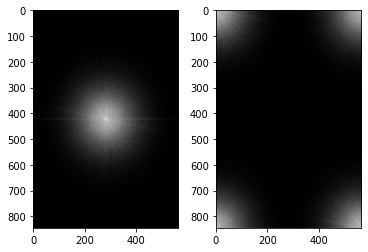

In [205]:
LowPass_BW_shift_inverse = np.fft.ifftshift(LowPass_BW_Center)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowPass_BW_Center)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPass_BW_shift_inverse)), cmap="gray")

Aplicação da transformada inversa de fourier:

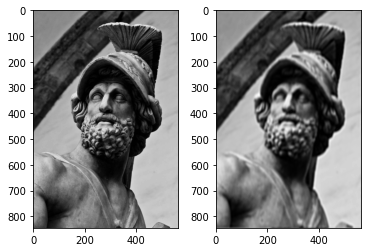

In [206]:
inverse_LowPass_BW = np.fft.ifft2(LowPass_BW_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowPass_BW), cmap="gray")

# Passa-alta Butterworth

$$
H(u,v) = \frac{1}{1 + [\frac{D_0}{D(u,v)}]^{2n}}
$$

## código:

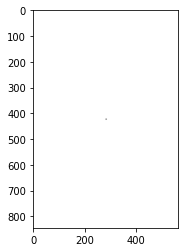

In [207]:
#filtro passa-alta butterworth

def passa_alta_butterworth(D_0, imgageShape, n):
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1 + D_0/(distance((y,x),center))**(2*n))

    return base

HighPass_BW = passa_alta_butterworth(50, image.shape, 3)
plt.imshow(np.abs(HighPass_BW), "gray")

plt.show()

Aplicação do filtro na imagem após o shift:

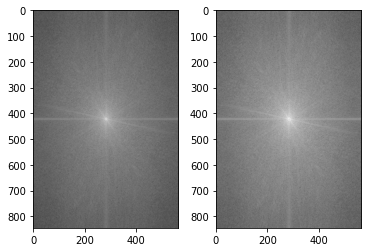

In [208]:
HighPass_BW_Center = image_fft_shift * HighPass_BW

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPass_BW_Center)), cmap="gray")

Aplicação do shift inverso:

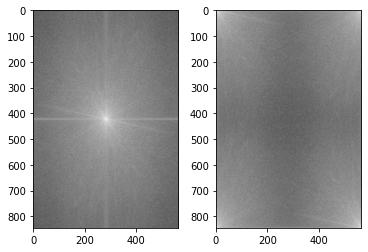

In [209]:
HighPass_BW_shift_inverse = np.fft.ifftshift(HighPass_BW_Center)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(HighPass_BW_Center)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPass_BW_shift_inverse)), cmap="gray")

Aplicação da transformada inversa de fourier:

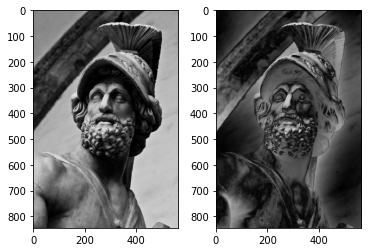

In [210]:
inverse_HighPass_BW = np.fft.ifft2(HighPass_BW_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_HighPass_BW), cmap="gray")

# Passa-baixa Gaussiano

* Os filtros passa-baixa gaussianos de duas dimensões têm a forma:
$$
H(u,v) = e^{\frac{-D^2(u,v)}{2D_0^2}}
$$
* $D(u,v)$ é a distância a partir do centro do retângulo de frequência e $D_0$ a frequência de corte.
* Também possui a função de suavizar a imagem (_smoothing/blur_)

## código:

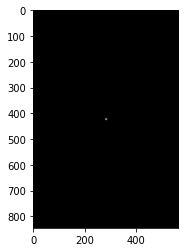

In [211]:
#filtro passa-baixa gaussiano

def passa_baixa_gaussiano(D_0, imgageShape, n):
    e = 1.1
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base [y,x] = e ** -(distance((y,x),center))**2/(2*D_0**2)
    return base

LowPass_G = passa_baixa_gaussiano(50, image.shape, 3)
plt.imshow(np.abs(LowPass_G), "gray")

plt.show()

Aplicação do filtro na imagem após o shift:

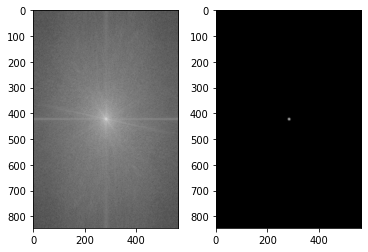

In [212]:
LowPass_G_Center = image_fft_shift * LowPass_G

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPass_G_Center)), cmap="gray")

Aplicação do shift inverso:

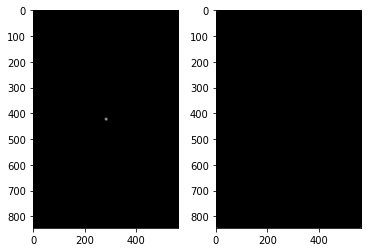

In [213]:
LowPass_G_shift_inverse = np.fft.ifftshift(LowPass_G_Center)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(LowPass_G_Center)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(LowPass_G_shift_inverse)), cmap="gray")

Aplicação da transformada inversa de fourier:

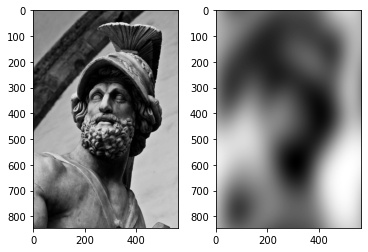

In [214]:
inverse_LowPass_G = np.fft.ifft2(LowPass_G_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_LowPass_G), cmap="gray")

# Passa-alta Gaussiano

$$
H(u,v) = 1 - e^{\frac{-D^2(u,v)}{2D_0^2}}
$$

## código:

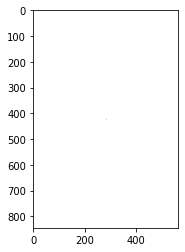

In [215]:
#filtro passa-alta gaussiano

def passa_alta_gaussiano(D_0, imgageShape, n):
    e = 2.7
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - e ** -(distance((y,x),center))**2/(2*D_0**2)
    return base

HighPass_G = passa_alta_gaussiano(50, image.shape, 3)
plt.imshow(np.abs(HighPass_G), "gray")

plt.show()

Aplicação do filtro na imagem após o shift:

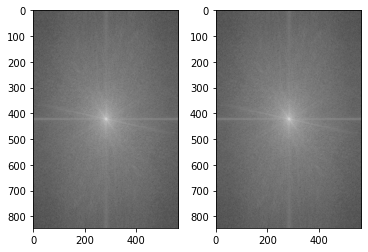

In [216]:
HighPass_G_Center = image_fft_shift * HighPass_G

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(image_fft_shift)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPass_G_Center)), cmap="gray")

Aplicação do shift inverso:

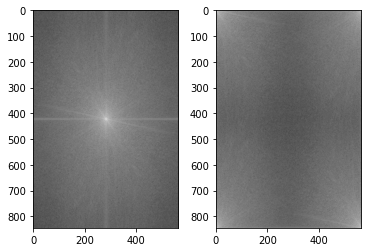

In [217]:
HighPass_G_shift_inverse = np.fft.ifftshift(HighPass_G_Center)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(np.log(1+np.abs(HighPass_G_Center)), cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.log(1+np.abs(HighPass_G_shift_inverse)), cmap="gray")

Aplicação da transformada inversa de fourier:

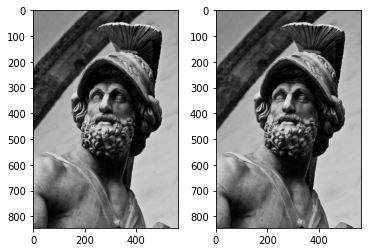

In [218]:
inverse_HighPass_G = np.fft.ifft2(HighPass_G_shift_inverse)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image, cmap="gray")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.abs(inverse_HighPass_G), cmap="gray")